<a href="https://colab.research.google.com/github/poulami-samaddar/hello-world/blob/master/MTA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd

col_name = ['C/A','UNIT','SCP','DATE1','TIME1','DESC1','ENTRIES1','EXITS1','DATE2','TIME2','DESC2','ENTRIES2','EXITS2',
            'DATE3','TIME3','DESC3','ENTRIES3','EXITS3','DATE4','TIME4','DESC4','ENTRIES4','EXITS4',
            'DATE5','TIME5','DESC5','ENTRIES5','EXITS5','DATE6','TIME6','DESC6','ENTRIES6','EXITS6',
            'DATE7','TIME7','DESC7','ENTRIES7','EXITS7','DATE8','TIME8','DESC8','ENTRIES8','EXITS8']
df = pd.DataFrame(columns = col_name)  #empty data frame created

url = 'http://web.mta.info/developers/turnstile.html' 
#Set the URL you want to webscrape from
response = requests.get(url)
#Connect to the URL
soup = BeautifulSoup(response.text, 'html.parser')
#Parse HTML and save to BeautifulSoup object
line_count = 1 #variable to track what line you are on

for one_a_tag in soup.findAll('a'): #'a' tags are for hyperlinks in the wabe page
    # print('before if')    
    if line_count >= 352 and line_count <= 496: 
        #code for text files starts at Oct11,2014 and ends at Jan7,2012
        link = one_a_tag['href']
        
        download_url = 'http://web.mta.info/developers/'+ link
        
        data = pd.read_csv(download_url, sep=",", header=None, names = col_name)
        
        df = df.append(data, ignore_index=True)
        
        print(line_count)  #to check loop
    
    #time.sleep(1) #pause the code for a sec
    # print('after if')
    line_count +=1

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,11,12,16,17,21,22,26,27,31,36,37,42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


470
471
472
473
474
475
476
477
478
479


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (42) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496


In [2]:
df.head()

,C/A,UNIT,SCP,DATE1,TIME1,DESC1,ENTRIES1,EXITS1,DATE2,TIME2,DESC2,ENTRIES2,EXITS2,DATE3,TIME3,DESC3,ENTRIES3,EXITS3,DATE4,TIME4,DESC4,ENTRIES4,EXITS4,DATE5,TIME5,DESC5,ENTRIES5,EXITS5,DATE6,TIME6,DESC6,ENTRIES6,EXITS6,DATE7,TIME7,DESC7,ENTRIES7,EXITS7,DATE8,TIME8,DESC8,ENTRIES8,EXITS8
0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,01:00:00,REGULAR,0000805439,0001141080 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,05:00:00,REGULAR,0000805459,0001141141 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,09:00:00,REGULAR,0000805589,0001141257 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,13:00:00,REGULAR,0000805834,0001141512 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(4402033, 43)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4402033 entries, 0 to 4402032
Data columns (total 43 columns):
 #   Column    Dtype  
---  ------    -----  
 0   C/A       object 
 1   UNIT      object 
 2   SCP       object 
 3   DATE1     object 
 4   TIME1     object 
 5   DESC1     object 
 6   ENTRIES1  object 
 7   EXITS1    object 
 8   DATE2     object 
 9   TIME2     object 
 10  DESC2     object 
 11  ENTRIES2  object 
 12  EXITS2    object 
 13  DATE3     object 
 14  TIME3     object 
 15  DESC3     object 
 16  ENTRIES3  object 
 17  EXITS3    object 
 18  DATE4     object 
 19  TIME4     object 
 20  DESC4     object 
 21  ENTRIES4  object 
 22  EXITS4    object 
 23  DATE5     object 
 24  TIME5     object 
 25  DESC5     object 
 26  ENTRIES5  object 
 27  EXITS5    object 
 28  DATE6     object 
 29  TIME6     object 
 30  DESC6     object 
 31  ENTRIES6  object 
 32  EXITS6    float64
 33  DATE7     object 
 34  TIME7     object 
 35  DESC7     object 
 36  ENTRIES7

In [7]:
df.describe()

,EXITS6,ENTRIES8
count,3.770377e+06,3.653967e+06
mean,3.354246e+06,4.949464e+06
std,3.318537e+07,3.496069e+07
min,-9.961134e+08,-9.811392e+08
25%,2.126380e+05,3.644545e+05
50%,1.235279e+06,1.983404e+06
75%,3.636584e+06,4.957689e+06
max,9.797130e+08,9.900589e+08


In [9]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'DATE1', 'TIME1', 'DESC1', 'ENTRIES1', 'EXITS1',
       'DATE2', 'TIME2', 'DESC2', 'ENTRIES2', 'EXITS2', 'DATE3', 'TIME3',
       'DESC3', 'ENTRIES3', 'EXITS3', 'DATE4', 'TIME4', 'DESC4', 'ENTRIES4',
       'EXITS4', 'DATE5', 'TIME5', 'DESC5', 'ENTRIES5', 'EXITS5', 'DATE6',
       'TIME6', 'DESC6', 'ENTRIES6', 'EXITS6', 'DATE7', 'TIME7', 'DESC7',
       'ENTRIES7', 'EXITS7', 'DATE8', 'TIME8', 'DESC8', 'ENTRIES8', 'EXITS8'],
      dtype='object')

In [17]:
df[['ENTRIES1','ENTRIES2','ENTRIES3', 'ENTRIES4', 'ENTRIES5', 'ENTRIES6', 'ENTRIES7','ENTRIES8']].tail(100)

,ENTRIES1,ENTRIES2,ENTRIES3,ENTRIES4,ENTRIES5,ENTRIES6,ENTRIES7,ENTRIES8
4401933,146560,146603,146626,146669,146689,146693,146698,146726.0
4401934,146756,146787,146830,146846,NaN,NaN,NaN,NaN
4401935,123211,123219,123230,123242,123268,123296,123317,123319.0
4401936,123328,123340,123362,123385,123403,123406,123435,123475.0
4401937,123523,123569,123586,123587,123610,123640,123685,123749.0
...,...,...,...,...,...,...,...,...
4402028,5554,5554,5554,5554,5554,5554,5554,5554.0
4402029,5554,5554,5554,5554,5554,5554,5554,5554.0
4402030,5554,5554,5554,5554,5554,5554,5554,5554.0
4402031,5554,5554,5554,5554,5554,5554,5554,5554.0


In [19]:
df[['EXITS1','EXITS2','EXITS3','EXITS4','EXITS5','EXITS6','EXITS7','EXITS8']].tail(10)

,EXITS1,EXITS2,EXITS3,EXITS4,EXITS5,EXITS6,EXITS7,EXITS8
4402023,62,62,62,62,62,62.0,62,62
4402024,62,62,62,62,62,62.0,62,62
4402025,62,62,62,62,62,62.0,62,62
4402026,62,62,62,62,62,62.0,62,NaN
4402027,43,43,43,43,43,43.0,43,43
4402028,43,43,43,43,43,43.0,43,43
4402029,43,43,43,43,43,43.0,43,43
4402030,43,43,43,43,43,43.0,43,43
4402031,43,43,43,43,43,43.0,43,43
4402032,43,43,43,43,43,43.0,43,NaN


In [20]:
df.fillna(value = 0)

,C/A,UNIT,SCP,DATE1,TIME1,DESC1,ENTRIES1,EXITS1,DATE2,TIME2,DESC2,ENTRIES2,EXITS2,DATE3,TIME3,DESC3,ENTRIES3,EXITS3,DATE4,TIME4,DESC4,ENTRIES4,EXITS4,DATE5,TIME5,DESC5,ENTRIES5,EXITS5,DATE6,TIME6,DESC6,ENTRIES6,EXITS6,DATE7,TIME7,DESC7,ENTRIES7,EXITS7,DATE8,TIME8,DESC8,ENTRIES8,EXITS8
0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0
1,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,01:00:00,REGULAR,0000805439,0001141080 ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0
2,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,05:00:00,REGULAR,0000805459,0001141141 ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0
3,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,09:00:00,REGULAR,0000805589,0001141257 ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0
4,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,13:00:00,REGULAR,0000805834,0001141512 ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402028,TRAM2,R469,00-05-01,01-08-12,04:00:00,REGULAR,5554,43,01-08-12,04:00:00,RECOVR,5554,43,01-08-12,08:00:00,AUD,5554,43,01-08-12,12:00:00,REGULAR,5554,43,01-08-12,16:00:00,REGULAR,5554,43,01-08-12,20:00:00,REGULAR,5554,43.0,01-09-12,00:00:00,REGULAR,5554,43,01-09-12,04:00:00,REGULAR,5554.0,43
4402029,TRAM2,R469,00-05-01,01-09-12,08:00:00,REGULAR,5554,43,01-09-12,12:00:00,REGULAR,5554,43,01-09-12,16:00:00,REGULAR,5554,43,01-09-12,20:00:00,REGULAR,5554,43,01-10-12,00:00:00,REGULAR,5554,43,01-10-12,04:00:00,REGULAR,5554,43.0,01-10-12,08:00:00,REGULAR,5554,43,01-10-12,12:00:00,REGULAR,5554.0,43
4402030,TRAM2,R469,00-05-01,01-10-12,16:00:00,REGULAR,5554,43,01-10-12,20:00:00,REGULAR,5554,43,01-11-12,00:00:00,REGULAR,5554,43,01-11-12,04:00:00,REGULAR,5554,43,01-11-12,04:00:00,RECOVR,5554,43,01-11-12,08:00:00,AUD,5554,43.0,01-11-12,12:00:00,REGULAR,5554,43,01-11-12,16:00:00,REGULAR,5554.0,43
4402031,TRAM2,R469,00-05-01,01-11-12,20:00:00,REGULAR,5554,43,01-12-12,00:00:00,REGULAR,5554,43,01-12-12,04:00:00,REGULAR,5554,43,01-12-12,04:00:00,RECOVR,5554,43,01-12-12,08:00:00,AUD,5554,43,01-12-12,12:00:00,REGULAR,5554,43.0,01-12-12,16:00:00,REGULAR,5554,43,01-12-12,20:00:00,REGULAR,5554.0,43


In [22]:
df['in_out'] = df['ENTRIES8'] + df['EXITS6']

In [23]:
df['in_out']

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
            ...  
4402028    5597.0
4402029    5597.0
4402030    5597.0
4402031    5597.0
4402032       NaN
Name: in_out, Length: 4402033, dtype: float64

In [24]:
df['UNIT'].value_counts()

R043    79811
R549    56529
R084    42908
R057    42260
R550    37886
        ...  
R459     1579
OF         10
R508        9
R538        7
UNIT        1
Name: UNIT, Length: 471, dtype: int64

In [25]:
df.to_csv('MTA')

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

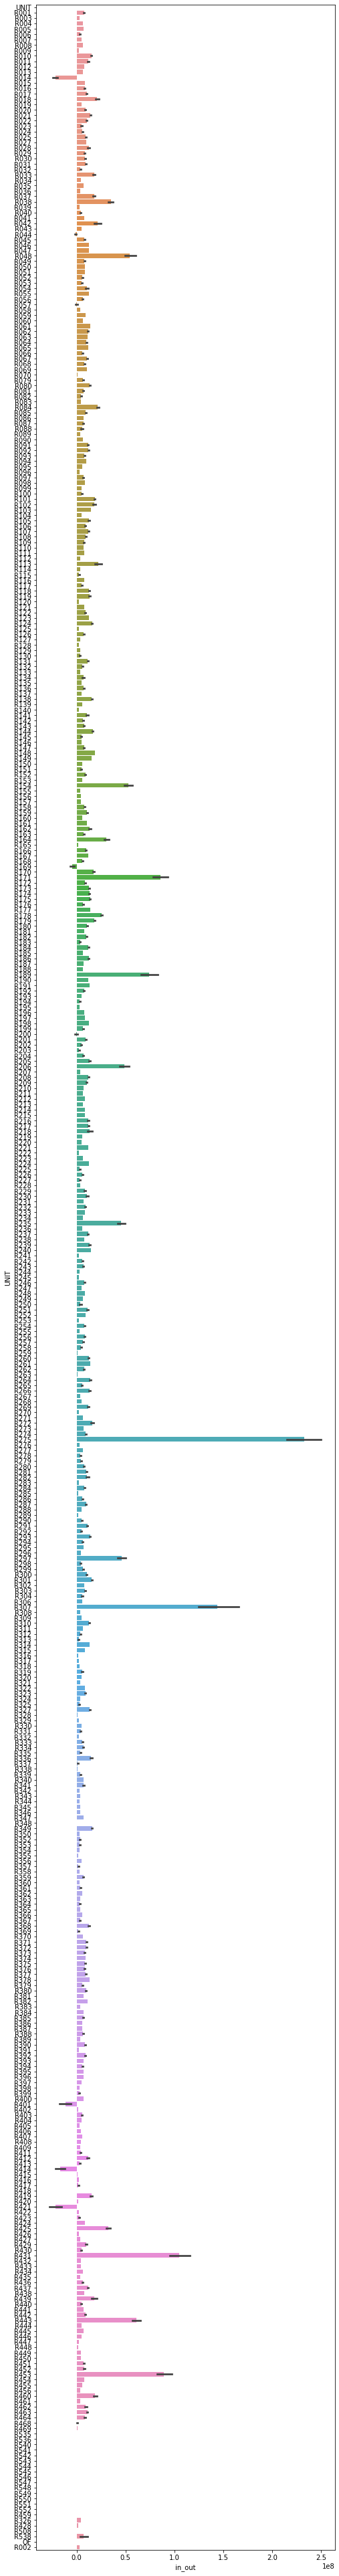

In [32]:
plt.figure(figsize=(8,70))
sns.barplot(x='in_out', y = 'UNIT', data = df)
plt.savefig("in_outvsUnit.png")

In [33]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'DATE1', 'TIME1', 'DESC1', 'ENTRIES1', 'EXITS1',
       'DATE2', 'TIME2', 'DESC2', 'ENTRIES2', 'EXITS2', 'DATE3', 'TIME3',
       'DESC3', 'ENTRIES3', 'EXITS3', 'DATE4', 'TIME4', 'DESC4', 'ENTRIES4',
       'EXITS4', 'DATE5', 'TIME5', 'DESC5', 'ENTRIES5', 'EXITS5', 'DATE6',
       'TIME6', 'DESC6', 'ENTRIES6', 'EXITS6', 'DATE7', 'TIME7', 'DESC7',
       'ENTRIES7', 'EXITS7', 'DATE8', 'TIME8', 'DESC8', 'ENTRIES8', 'EXITS8',
       'in_out'],
      dtype='object')

In [35]:
df.sort_values(by = 'in_out').head(5)

,C/A,UNIT,SCP,DATE1,TIME1,DESC1,ENTRIES1,EXITS1,DATE2,TIME2,DESC2,ENTRIES2,EXITS2,DATE3,TIME3,DESC3,ENTRIES3,EXITS3,DATE4,TIME4,DESC4,ENTRIES4,EXITS4,DATE5,TIME5,DESC5,ENTRIES5,EXITS5,DATE6,TIME6,DESC6,ENTRIES6,EXITS6,DATE7,TIME7,DESC7,ENTRIES7,EXITS7,DATE8,TIME8,DESC8,ENTRIES8,EXITS8,in_out
685964,R610,R057,00-05-01,06-14-14,13:17:53,LGF-MAN,-981139200,-722153728,06-14-14,13:22:28,LOGON,-9.81139e+08,-7.22154e+08,06-14-14,13:36:37,DOOR CLOSE,-9.81139e+08,-7.22154e+08,06-14-14,16:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-14-14,20:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-15-14,00:00:00,REGULAR,-9.81139e+08,-722153728.0,06-15-14,04:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-15-14,08:00:00,REGULAR,-981139200.0,-7.22154e+08,-1.703293e+09
685968,R610,R057,00-05-01,06-19-14,12:00:00,REGULAR,-981139200,-722153728,06-19-14,16:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-19-14,20:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-20-14,00:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-20-14,04:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-20-14,08:00:00,REGULAR,-9.81139e+08,-722153728.0,06-20-14,12:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-20-14,13:49:26,DOOR OPEN,-981139200.0,-7.22154e+08,-1.703293e+09
685967,R610,R057,00-05-01,06-18-14,04:00:00,REGULAR,-981139200,-722153728,06-18-14,08:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-18-14,12:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-18-14,16:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-18-14,20:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-19-14,00:00:00,REGULAR,-9.81139e+08,-722153728.0,06-19-14,04:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-19-14,08:00:00,REGULAR,-981139200.0,-7.22154e+08,-1.703293e+09
715366,R610,R057,00-05-01,06-11-14,11:19:18,LOGON,-981139200,-722153728,06-11-14,11:22:22,LGF-MAN,-9.81139e+08,-7.22154e+08,06-11-14,11:26:11,LOGON,-9.81139e+08,-7.22154e+08,06-11-14,11:35:35,LOGON,-9.81139e+08,-7.22154e+08,06-11-14,11:41:57,LOGON,-9.81139e+08,-7.22154e+08,06-11-14,11:42:04,LGF-MAN,-9.81139e+08,-722153728.0,06-11-14,11:42:18,DOOR CLOSE,-9.81139e+08,-7.22154e+08,06-11-14,11:45:40,DOOR OPEN,-981139200.0,-7.22154e+08,-1.703293e+09
685966,R610,R057,00-05-01,06-16-14,20:00:00,REGULAR,-981139200,-722153728,06-17-14,00:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-17-14,04:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-17-14,08:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-17-14,12:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-17-14,16:00:00,REGULAR,-9.81139e+08,-722153728.0,06-17-14,20:00:00,REGULAR,-9.81139e+08,-7.22154e+08,06-18-14,00:00:00,REGULAR,-981139200.0,-7.22154e+08,-1.703293e+09


In [1]:
df.groupby(by = ['UNIT','in_out']).min()

NameError: ignored

In [2]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import pandas as pd

In [4]:
df = pd.read_csv('MTA')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,37,38,39,40,41,43) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,Unnamed: 0,C/A,UNIT,SCP,DATE1,TIME1,DESC1,ENTRIES1,EXITS1,DATE2,TIME2,DESC2,ENTRIES2,EXITS2,DATE3,TIME3,DESC3,ENTRIES3,EXITS3,DATE4,TIME4,DESC4,ENTRIES4,EXITS4,DATE5,TIME5,DESC5,ENTRIES5,EXITS5,DATE6,TIME6,DESC6,ENTRIES6,EXITS6,DATE7,TIME7,DESC7,ENTRIES7,EXITS7,DATE8,TIME8,DESC8,ENTRIES8,EXITS8,in_out
0,0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,01:00:00,REGULAR,0000805439,0001141080 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,05:00:00,REGULAR,0000805459,0001141141 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,09:00:00,REGULAR,0000805589,0001141257 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,A060,R001,00-00-00,WHITEHALL ST,R1,BMT,10/11/2014,13:00:00,REGULAR,0000805834,0001141512 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df['in_out'] = df['ENTRIES8'] + df['EXITS6']

In [9]:
groupby_df = df.groupby('UNIT')

In [36]:
new_df = groupby_df['in_out'].first().reset_index(name = "entries&exits")

In [37]:
new_df.head()

,UNIT,entries&exits
0,OF,NaN
1,R001,829897.0
2,R002,3902673.0
3,R003,242115.0
4,R004,11979433.0


In [38]:
five_station = new_df.sort_values(by = 'entries&exits').head(6)

In [39]:
five_station

,UNIT,entries&exits
409,R421,-995997066.0
79,R088,1.0
453,R508,25.0
95,R104,50.0
164,R173,138.0
450,R464,301.0


In [40]:
five_station.drop(409, inplace=True)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

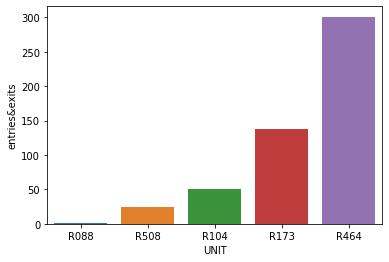

In [42]:
sns.barplot(x = 'UNIT', y = 'entries&exits', data = five_station)
plt.savefig("entries&exits vs unit.png")